# Plan de trabajo: Predicción de la tasa de cancelación de los clientes de una empresa de telecomunicaciones

## Introducción

El operador de telecomunicaciones Interconnect busca predecir su tasa de cancelación de clientes con el objetivo de retener a aquellos usuarios que podrían estar considerando dejar el servicio. Si se identifica que un cliente tiene la intención de cancelar, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado una variedad de datos personales de sus clientes, incluyendo información relacionada con sus planes y contratos.

### Descripción del proyecto

El proyecto se estructura en las siguientes partes:

- __Inicialización__: Importar y describir los conjuntos de datos.


- __Preprocesamiento de datos__:  Limpiar y preparar los datos para el análisis, abordando la trasnformación de las variables al tipo de dato correcto, la eliminación de valores duplicados y la gestión de valores nulos.


- __Análisis Exploratorio de Datos (EDA)__: Realizar una revisón de los datos para identificar patrones, tendencias, y posibles desequilibrios en las clases.


- __Lista de preguntas__: Plantear una lista de preguntas que permitan aclarar cualquier aspecto del proyecto.


- __Plan de trabajo__: Desarrollar un plan que describa los pasos a seguir para guiar el desarrollo del proyecto.


## Inicialización

In [1]:
# Cargar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Cargar archivos archivos csv
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv') 
phone = pd.read_csv('/datasets/final_provider/phone.csv')

### Descripción de los datos


Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna customerID (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.


In [3]:
# Identificar valores nulos y tipos de datos
dataframes = [contract, personal, internet, phone]
names = ['contract', 'personal', 'internet', 'phone']
for name, df in zip(names, dataframes):
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(f"=======Valores nulos y tipos de datos de {name}:=======")
    print(df.info())
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++
=======Valores nulos y tipos de datos de contract:=======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++
=======Valores nulos y tipos de datos de personal:=======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Dat

Cada archivo contiene la columna `customerID` que sirve como identificador único de cada cliente, la cual se empleará para unificar todos los conjuntos. Además, se identificó que se tienen que modificar el tipo de dato de las variables `TotalCharges del archivo`, `BeginDate` y `EndDate`. 

## Preprocesamiento de datos

In [4]:
# Unificar los conjuntos de datos
df = pd.merge(contract, personal, on='customerID')
df = pd.merge(df, internet, on='customerID', how='left')
df = pd.merge(df, phone, on='customerID', how='left')

In [5]:
# Vista parcial del nuevo conjunto
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [6]:
# Tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


### Transformación de variables

In [7]:
# Convertir 'BeginDate', 'EndDate' a tipo fecha
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format="%Y-%m-%d", errors='coerce')
df['EndDate'] = pd.to_datetime(df['EndDate'], format="%Y-%m-%d", errors='coerce')

In [8]:
# Convertir 'TotalCharges' a tipo númerico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
# Crear variable months (antigüedad en meses)
df['Months'] = (df['EndDate']- df['BeginDate']).dt.days / 30

### Valores duplicados

In [10]:
# Identificar registros duplicados
df.duplicated().sum()

0

### Valores nulos

In [11]:
# Cantidad de valores nulos en orden descendente 
null_counts = df.isna().sum().reset_index()
null_counts.columns = ['column', 'null_count']
null_counts = null_counts.sort_values('null_count', ascending=False).reset_index(drop=True)
null_counts

,column,null_count
0,Months,5174
1,EndDate,5174
2,InternetService,1526
3,StreamingMovies,1526
4,StreamingTV,1526
5,TechSupport,1526
6,DeviceProtection,1526
7,OnlineBackup,1526
8,OnlineSecurity,1526
9,MultipleLines,682


In [12]:
# Valores nulos de la varaible TotalCharges
df_null_TotalCharges = df[df["TotalCharges"].isna()]
df_null_TotalCharges 

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Months
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,...,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN,NaN
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN,Female,0,...,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No,NaN
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN,Female,0,...,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN,NaN
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN,Female,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN,Female,0,...,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes,NaN


In [13]:
# Registros donde 'BeginDate' es igual a "2020-02-01"
df_bd_2020_02_01 = df[df['BeginDate']=="2020-02-01"]
df_bd_2020_02_01

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Months
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,...,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN,NaN
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN,Female,0,...,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No,NaN
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN,Female,0,...,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN,NaN
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN,Female,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN,Female,0,...,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes,NaN


In [14]:
# Comparación de dataframes
df_null_TotalCharges .equals(df_bd_2020_02_01)

True

In [15]:
 # Imputar con 0 para "TotalCharges"
df["TotalCharges"] = df["TotalCharges"].fillna(0) 

En este apartado se unificó la información de los cuatro conjuntos. Se transformaron algunas variables en su formato correcto y se creó la variable `Months` para representar la antigüedad del cliente en meses. No se encontraron filas duplicadas. Por otra parte, se identificó que todos los valores nulos en TotalCharges corresponden a filas con `BeginDate` igual a "2020-02-01", la cual es la fecha más reciente del conjunto, de tal manera que, significa que esas personas son clientes nuevos y no tienen cargos, así que, se imputaron por el valor 0. 

## Análsis exploratorio de datos

In [18]:
# Valores nulos y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

In [16]:
# Medidas descriptivas para las variables cuantitativas
df.describe()

,MonthlyCharges,TotalCharges,SeniorCitizen,Months
count,7043.000000,7043.000000,7043.000000,1869.000000
mean,64.761692,2279.734304,0.162147,18.245069
std,30.090047,2266.794470,0.368612,19.812987
min,18.250000,0.000000,0.000000,1.000000
25%,35.500000,398.550000,0.000000,2.033333
50%,70.350000,1394.550000,0.000000,10.133333
75%,89.850000,3786.600000,0.000000,29.433333
max,118.750000,8684.800000,1.000000,73.033333


In [17]:
# Medidas descriptivas de las variables cualitativas
df.describe(include="object")

,customerID,Type,PaperlessBilling,PaymentMethod,gender,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
count,7043,7043,7043,7043,7043,7043,7043,5517,5517,5517,5517,5517,5517,5517,6361
unique,7043,3,2,4,2,2,2,2,2,2,2,2,2,2,2
top,9574-BOSMD,Month-to-month,Yes,Electronic check,Male,No,No,Fiber optic,No,No,No,No,No,No,No
freq,1,3875,4171,2365,3555,3641,4933,3096,3498,3088,3095,3473,2810,2785,3390


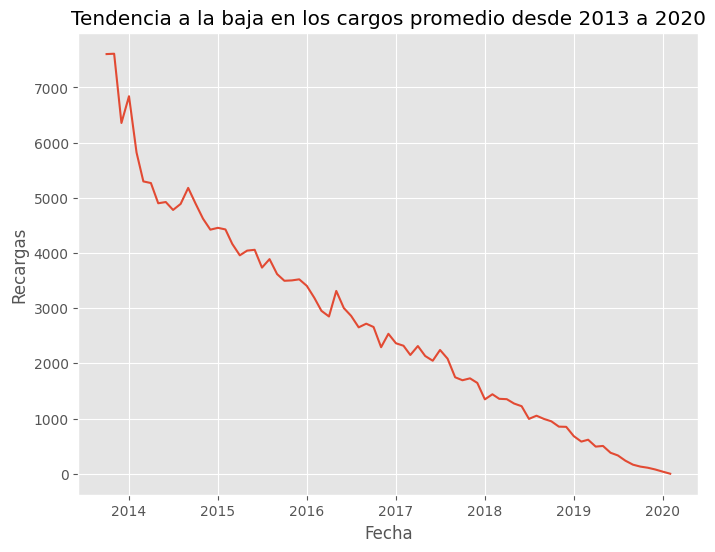

In [28]:
# Cargos promedio por fecha de incio del contrato
TotalCharges_mean_by_date = df[['BeginDate', 'TotalCharges']].groupby('BeginDate').mean().reset_index()
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(TotalCharges_mean_by_date['BeginDate'], TotalCharges_mean_by_date['TotalCharges'])
ax.set_title("Tendencia a la baja en los cargos promedio desde 2013 a 2020")
ax.set_xlabel("Fecha")
ax.set_ylabel("Recargas");

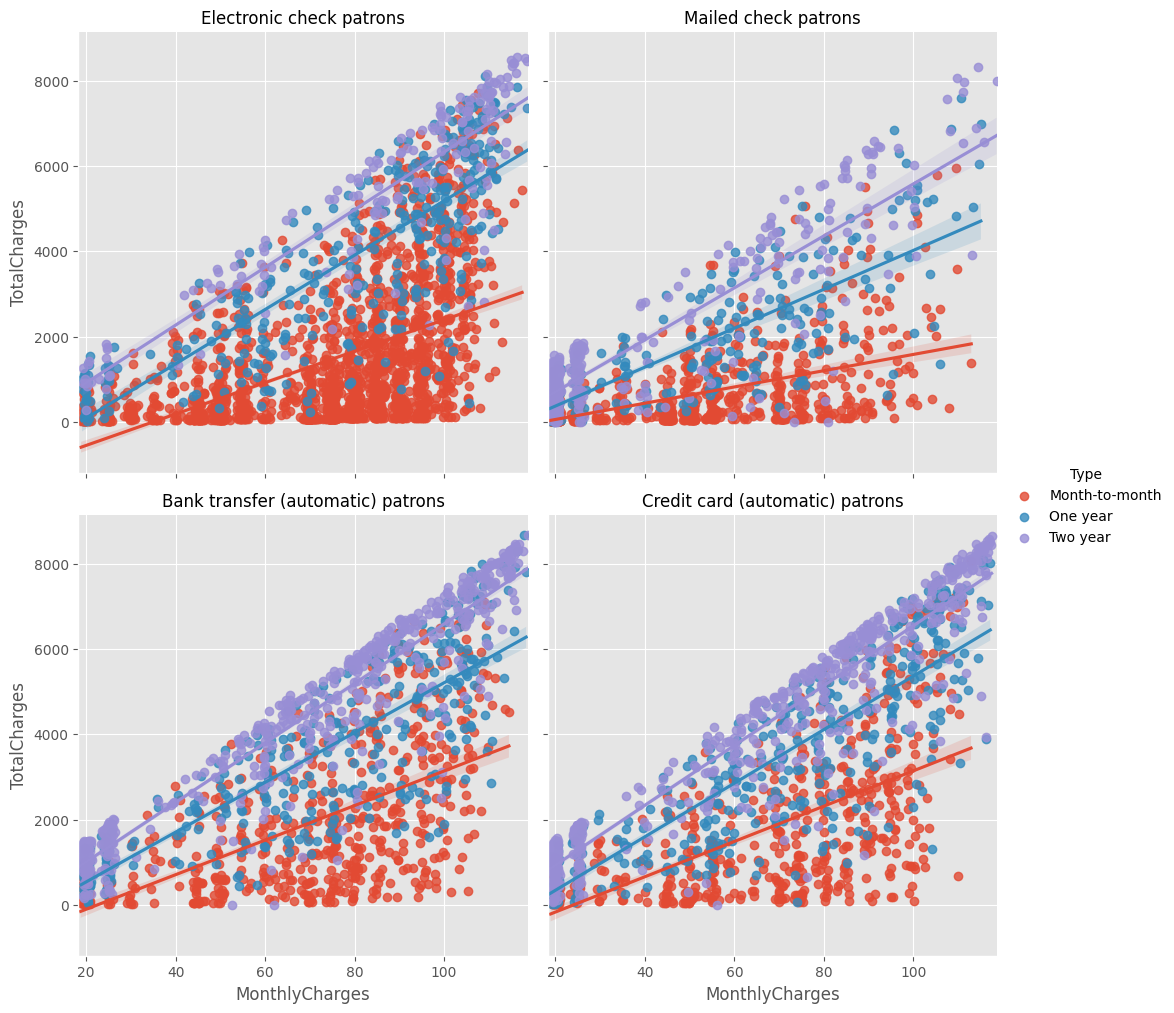

In [20]:
# Relación entre el cargo fijo mensual y el cargo total
g = sns.lmplot(
    x='MonthlyCharges',
    y='TotalCharges',
    data=df,
    hue="Type",
    col='PaymentMethod',
    col_wrap=2
)
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}");

In [21]:
# Variables tipo objeto y numéricas
var_object = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender',
       'Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'MultipleLines']
var_numeric = df.describe().columns

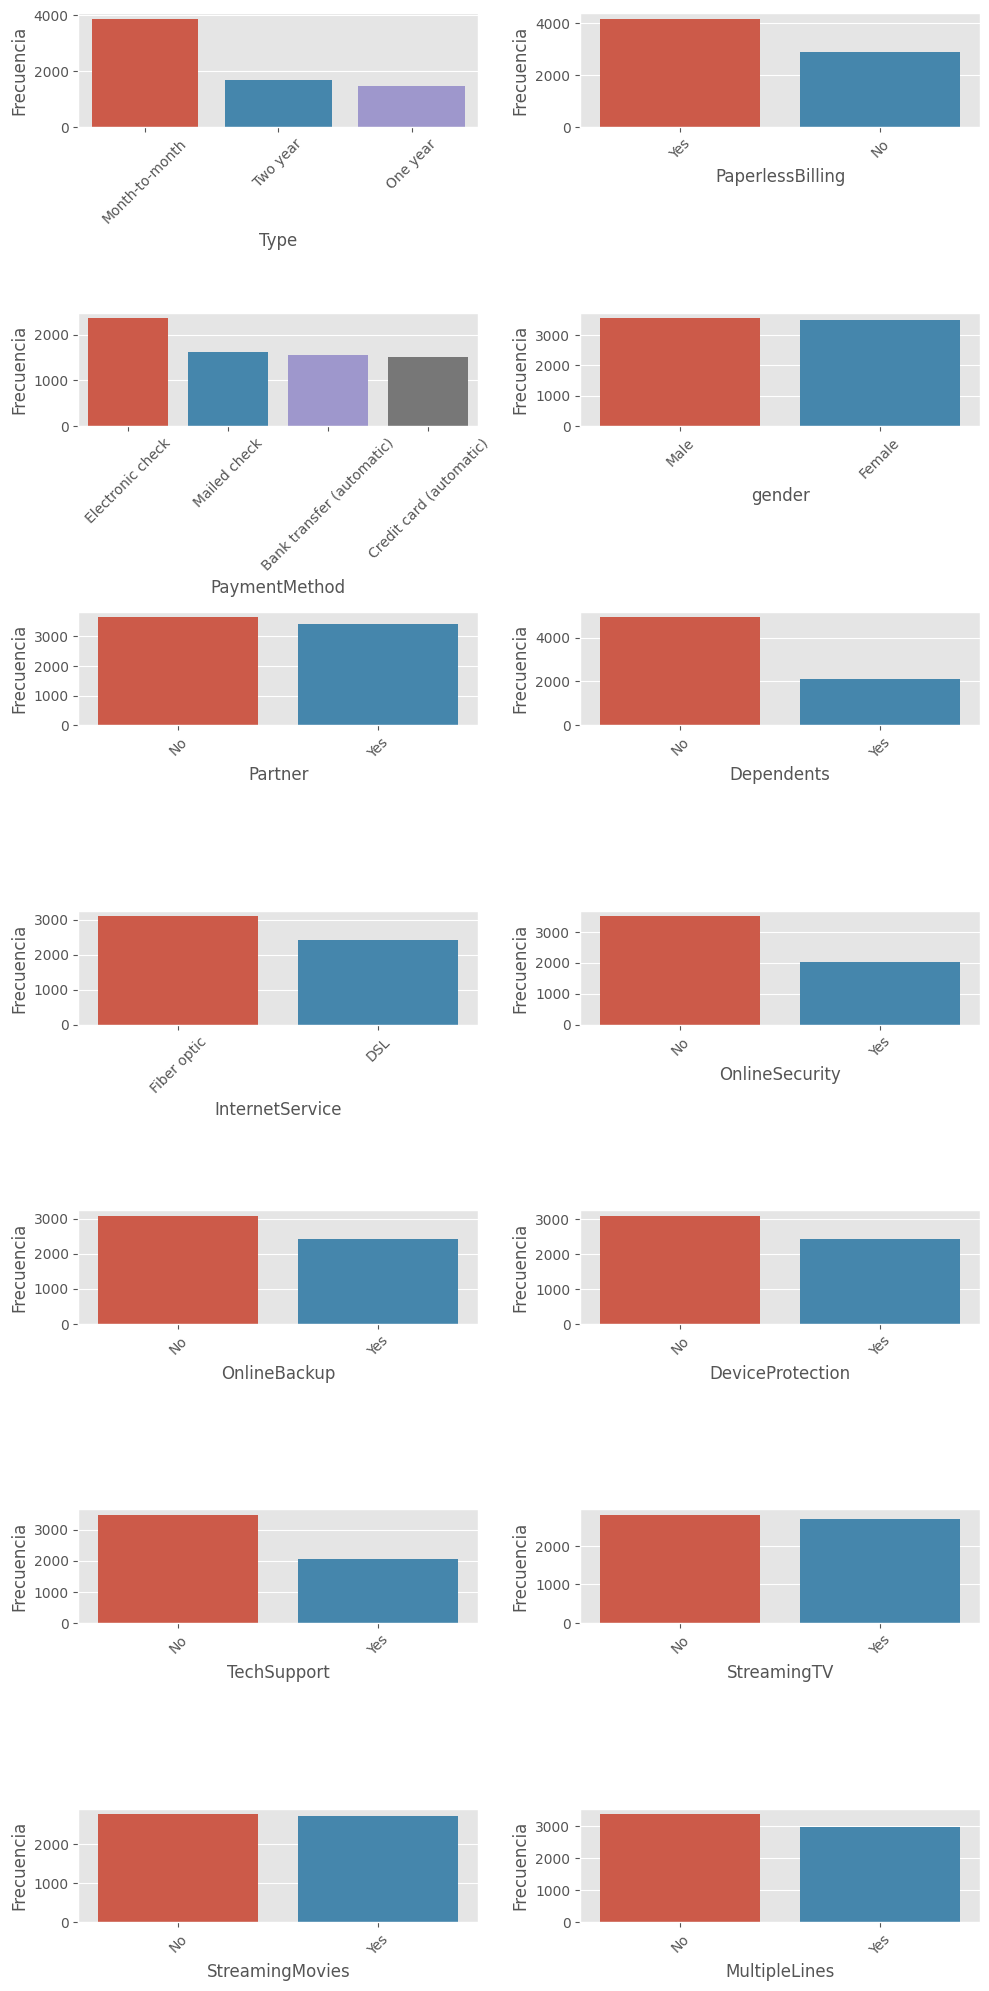

In [30]:
# Crear la figura y los ejes
fig, axes = plt.subplots(7, 2, figsize=(10, 20))
axes = axes.flatten()

# Crear gráficos de las variables cualtitativas
for i, col in enumerate(var_object):
    sns.countplot(x=col, data=df, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_ylabel('Frecuencia')

# Ajustar los espacios entre subgráficos
plt.tight_layout()
plt.show()

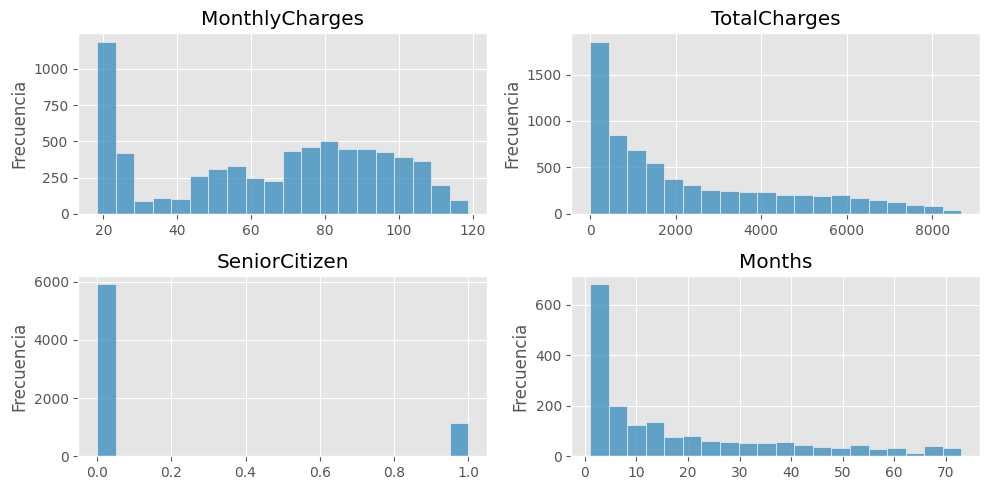

In [33]:
# Crear la figura y los ejes
fig, axes = plt.subplots(2, 2, figsize=(10,5))
axes = axes.flatten()

# Crear gráficos de las variables cuantitativas
for i, col in enumerate(var_numeric):
    sns.histplot(data=df, x=col, ax=axes[i], bins=20)
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xlabel('')
    

# Ajustar los espacios entre subgráficos
plt.tight_layout()
plt.show()

## Plan de trabajo

Plan de Trabajo


1. `Preparación de los datos para el modelo`:

- __Tranformación de variables__: Estandarizar las variables numéricas y aplicar técnicas de codificación.

- __División de los datos__: Dividir los datos en conjuntos de entrenamiento y prueba.

- __Tratamiento del desbalance de clases__: Aplicar técnica para equilibrar las clases.

2. `Modelado y evaluación`:

- __Selección del modelo__: Establecer los algoritmos que se emplearán como regresión logística, árboles de decisión, random forest y XGBoost

- __Entrenamiento y evaluación__: Entrenar los modelos en el conjunto de entrenamiento y evaluar su rendimiento utilizando la métrica AUC.

- __Selección del mejor modelo__: Elegir el modelo que obtenga los mejores resultados en términos de AUC.

3. `Interpretación de los resultados`:

- __Visualización de y explicación los resultados__: Crear gráficos para visualizar las predicciones del modelo y dar conclusiones.